## Importing the essential libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [23]:
df=pd.read_csv("heart[1].csv")

In [24]:
df.shape

(918, 12)

In [25]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Description of the predictors in the dataset

## Checking for null values in the dataset

In [27]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Visualization of the dataset

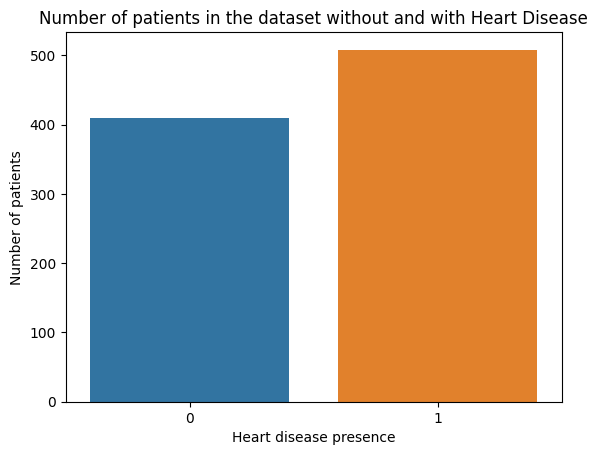

In [28]:
sns.countplot(x="HeartDisease",data=df)
plt.xlabel("Heart disease presence")
plt.ylabel("Number of patients")
plt.title("Number of patients in the dataset without and with Heart Disease")
plt.show()


508
410


([<matplotlib.patches.Wedge at 0x1d3ef2e2690>,
 [Text(-0.20028448518704137, 1.1831678346681682, 'heart disease'),
  Text(0.2002844851870415, -1.1831678346681682, 'no heart disease')],
 [Text(-0.11683261635910747, 0.6901812368897648, '55.34%'),
  Text(0.11683261635910754, -0.6901812368897648, '44.66%')])

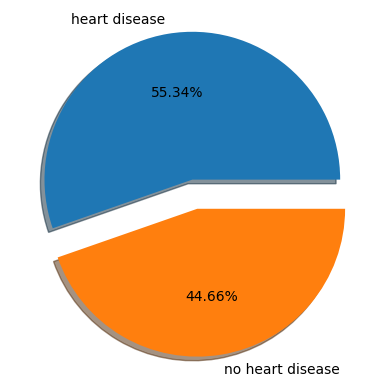

In [29]:
# Checking if the dataset is balanced

filtered_df1 = df[df['HeartDisease'] == 1]
disease_count = len(filtered_df1)
print(disease_count)

filtered_df2 = df[df['HeartDisease'] == 0]
no_disease_count = len(filtered_df2)
print(no_disease_count)

plot_list=[disease_count,no_disease_count]
hdpresence=["heart disease","no heart disease"]
plt.pie(plot_list,labels=hdpresence,shadow=True,autopct="%.2f%%",explode=(0.1,0.1))

## Visualization of the relationship between different predictors and the target variable

## AGE

c:\Users\debas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([20., 30., 40., 50., 60., 70., 80.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

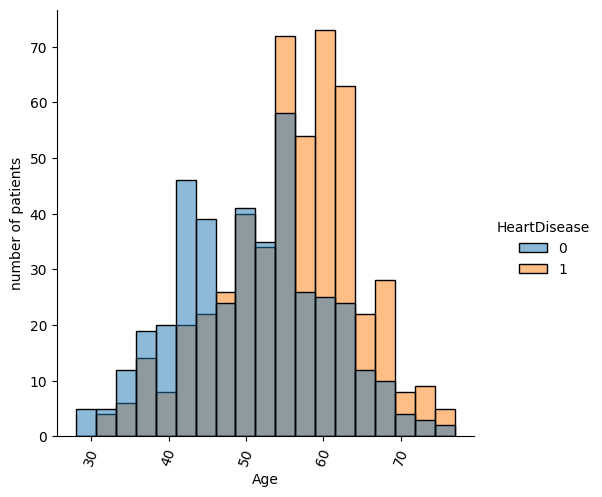

In [30]:
sns.displot(x="Age",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xticks(rotation=70)

Minimum age in dataset= 28
Maximum age in dataset= 77


<Axes: >

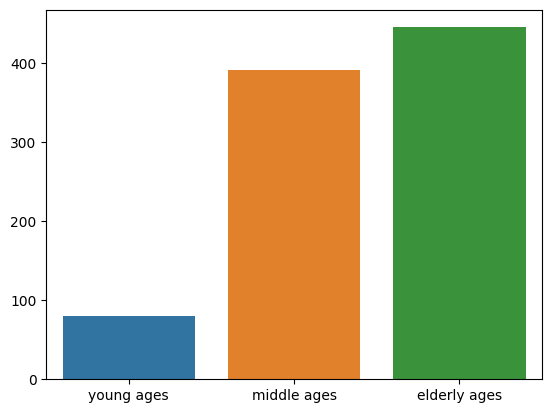

In [31]:
minAge=min(df.Age)
maxAge=max(df.Age)

print("Minimum age in dataset=",minAge)
print("Maximum age in dataset=",maxAge)

#we divide the age feature in 3 parts for easier visualization

young=df[(df.Age>=28)&(df.Age<40)]
middle=df[(df.Age>=40)&(df.Age<55)]
elder=df[(df.Age>=55)&(df.Age<77)]

sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young),len(middle),len(elder)])

## SEX

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

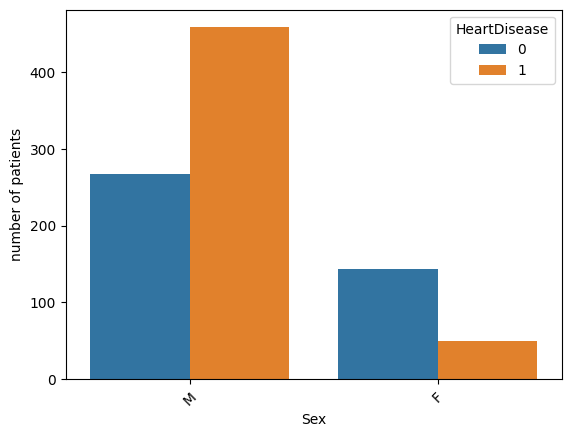

In [32]:
sns.countplot(x="Sex",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xticks(rotation=45)

## CHEST PAIN TYPE

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ATA'), Text(1, 0, 'NAP'), Text(2, 0, 'ASY'), Text(3, 0, 'TA')])

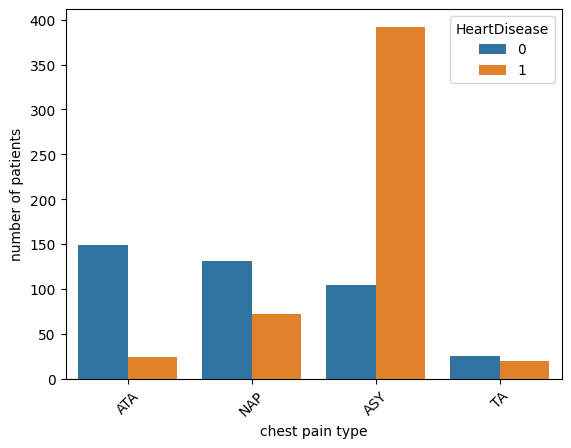

In [33]:
sns.countplot(x="ChestPainType",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xlabel("chest pain type")
plt.xticks(rotation=45)

## RESTING BLOOD PRESSURE

c:\Users\debas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(225.0, 0, '225')])

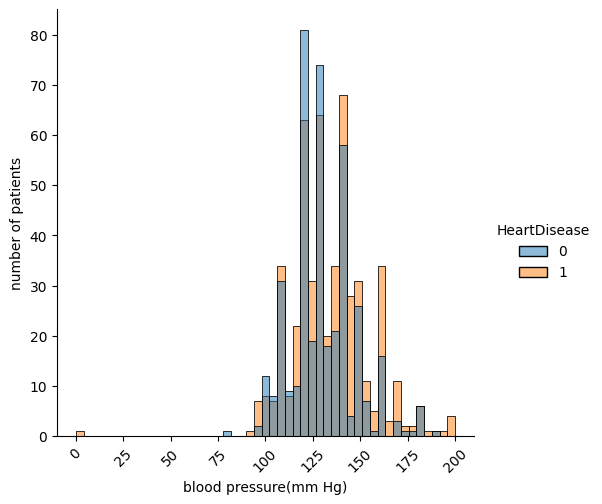

In [34]:
sns.displot(x="RestingBP",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xlabel("blood pressure(mm Hg)") 
plt.xticks(rotation=45)

## CHOLESTEROL

c:\Users\debas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

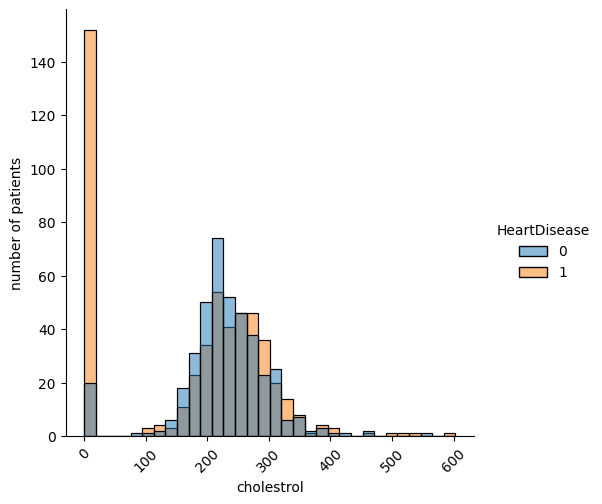

In [35]:
sns.displot(x="Cholesterol",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xlabel("cholestrol") 
plt.xticks(rotation=45)

## FASTING BLOOD SUGAR

Text(0.5, 0, 'sugar level>120mg/dl')

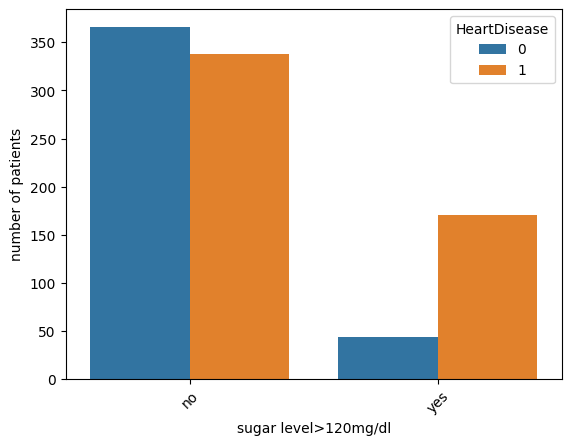

In [36]:
sns.countplot(x="FastingBS",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xticks([0,1],["no","yes"],rotation=45)
plt.xlabel("sugar level>120mg/dl")

## ECG ON REST

Text(0.5, 0, 'electrocardiogram on rest')

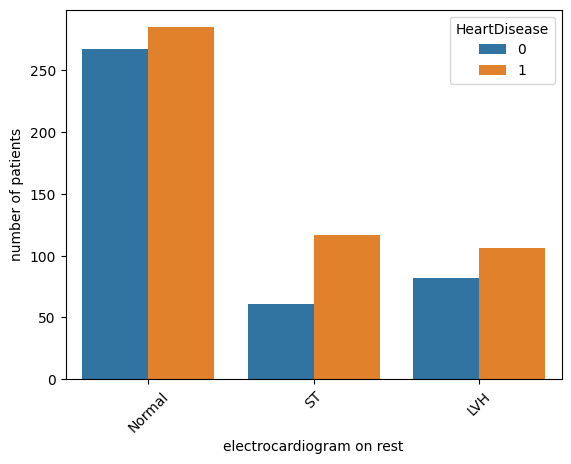

In [37]:
sns.countplot(x="RestingECG",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xticks(rotation=45)
plt.xlabel("electrocardiogram on rest")

## MAXIMUM HEART RATE ACHIEVED

c:\Users\debas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 [Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180'),
  Text(200.0, 0, '200'),
  Text(220.0, 0, '220')])

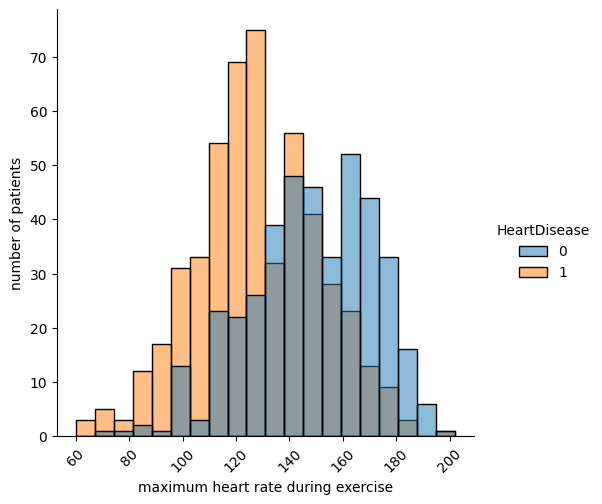

In [38]:
sns.displot(x="MaxHR",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xlabel("maximum heart rate during exercise") 
plt.xticks(rotation=45)

## EXERCISE-INDUCED ANGINA

Text(0.5, 0, 'presence of angina during exercise')

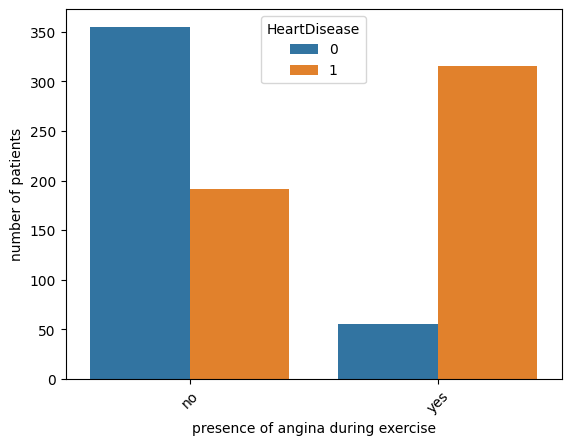

In [39]:
sns.countplot(x="ExerciseAngina",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xticks([0,1],["no","yes"],rotation=45)
plt.xlabel("presence of angina during exercise")

## OLDPEAK (ST DEPRESSION)

c:\Users\debas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([-4., -2.,  0.,  2.,  4.,  6.,  8.]),
 [Text(-4.0, 0, '−4'),
  Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8')])

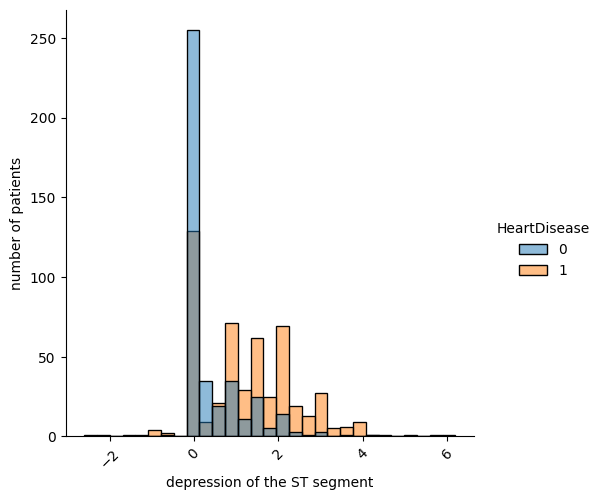

In [40]:
sns.displot(x="Oldpeak",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xlabel("depression of the ST segment") 
plt.xticks(rotation=45)

## ST SLOPE

(array([0, 1, 2]), [Text(0, 0, 'Up'), Text(1, 0, 'Flat'), Text(2, 0, 'Down')])

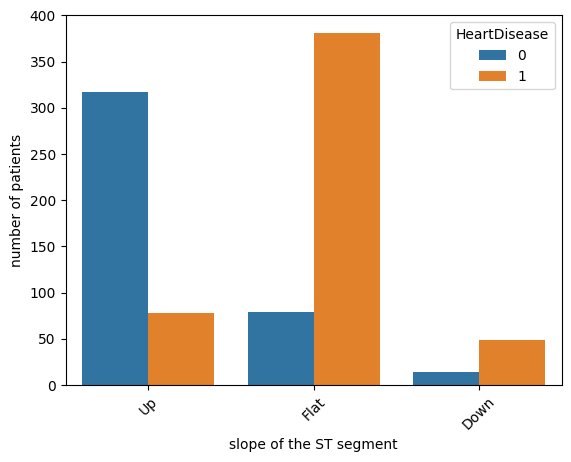

In [41]:
sns.countplot(x="ST_Slope",hue="HeartDisease",data=df)
plt.ylabel("number of patients")
plt.xlabel("slope of the ST segment") 
plt.xticks(rotation=45)

## Visualizing the correlation amongst the predictors

<Axes: >

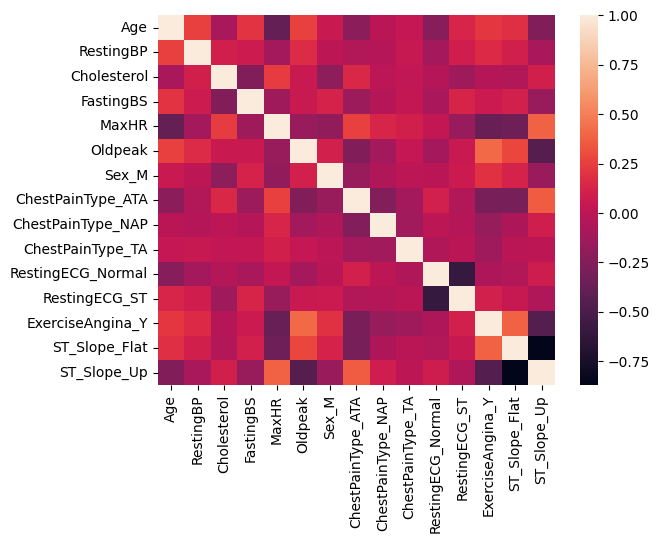

In [42]:

x_features=list(df.columns)
x_features.remove("HeartDisease")

dataset=pd.get_dummies(df[x_features],drop_first=True)
sns.heatmap(dataset.corr(),annot=False)

In [43]:
result=[]

## Predictive Models

### cross-validation function

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [45]:
skfolds=StratifiedKFold(n_splits=10,shuffle=True)

In [46]:
def stratified_fold(x_train,y_train,clf):
    lst=[]
    for train_index,test_index in skfolds.split(x_train,y_train):
        clone_clf=clone(clf)
        x_train_fold=x_train[train_index]
        y_train_fold=y_train[train_index]
        x_test_fold=x_train[test_index]
        y_test_fold=y_train[test_index]
        
        clone_clf.fit(x_train_fold,y_train_fold)
        y_pred=clone_clf.predict(x_test_fold)
        n_correct=sum(y_pred==y_test_fold)
        lst.append(n_correct/len(y_pred))
    return lst
    

### confusion matrix function

In [47]:
def draw_cm(actual,predicted):
    cm=metrics.confusion_matrix(actual,predicted,labels=[1,0])
    sns.heatmap(cm,annot=True,fmt=".2f")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

## K-Nearest Neighbors (K-NN)

In [48]:


## Importing the dataset

df = pd.read_csv('heart[1].csv')

df.shape

df.info()

df.head()

x_features=list(df.columns)
x_features.remove("HeartDisease")

x_features

dataset=pd.get_dummies(df[x_features],drop_first=True)

dataset.head()

dataset.shape


X = dataset.values
y = df.HeartDisease.values

X[0:5,:]

y

## Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =40)

## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### finding optimal parameters for our classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"n_neighbors":range(5,25),"metric":['minkowski'],"p":[1,2]}]
clf=GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=10,scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski'], 'n_neighbors': range(5, 25),
                          'p': [1, 2]}],
             scoring='roc_auc')

In [50]:
clf.best_score_

0.9370218504795119

In [51]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 21, 'p': 2}

### Training the K-NN model on the Training set

In [52]:

classifier = KNeighborsClassifier(n_neighbors = 21, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=21)

### k-fold cross validation

In [53]:
ans_k=stratified_fold(X_train, y_train,classifier)
ans=sum(ans_k)
print(ans_k)
print("average=",ans/10)

[0.8405797101449275, 0.8985507246376812, 0.9130434782608695, 0.855072463768116, 0.855072463768116, 0.855072463768116, 0.8840579710144928, 0.927536231884058, 0.8088235294117647, 0.8676470588235294]
average= 0.8705456095481671


### Roc Curve and auc score

In [54]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label="Roc curve (area = %0.2f)" % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    return fpr,tpr,thresholds

In [55]:
y_pred_df=pd.DataFrame({"actual":y_test,"predicted_prob":classifier.predict_proba(X_test)[:,1]})

In [56]:
y_pred_df["predicted"]=classifier.predict(X_test)

In [57]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted
217,1,0.714286,1
66,0,0.333333,0
9,1,1.000000,1
193,1,0.761905,1
15,1,0.904762,1
199,1,1.000000,1
25,1,1.000000,1
195,0,0.047619,0
154,1,0.714286,1
126,0,0.047619,0


In [58]:
from sklearn import metrics

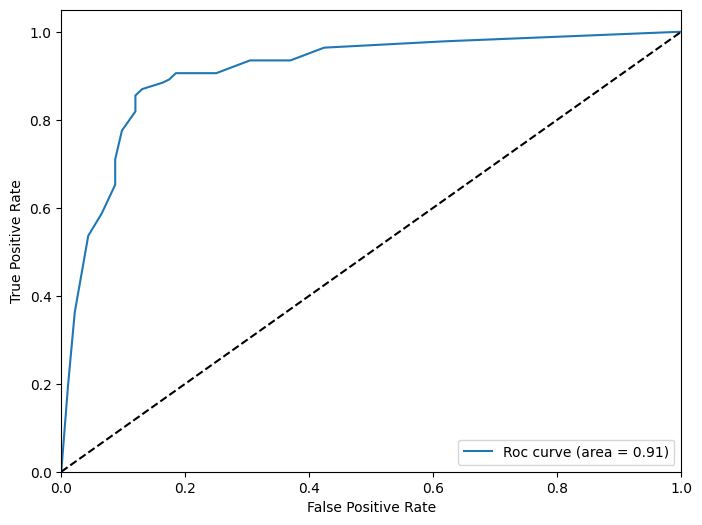

In [59]:
fpr,tpr,thresholds=draw_roc(y_pred_df.actual,y_pred_df.predicted_prob)

### Finding optimal cutoff probability(Youden's Index)

In [60]:
tpr_fpr=pd.DataFrame({"tpr":tpr,"fpr":fpr,"thresholds":thresholds})
tpr_fpr["diff"]=tpr_fpr.tpr-tpr_fpr.fpr
tpr_fpr.sort_values("diff",ascending=False)[0:5]

,tpr,fpr,thresholds,diff
11,0.869565,0.130435,0.523810,0.739130
10,0.855072,0.119565,0.571429,0.735507
12,0.884058,0.163043,0.476190,0.721014
14,0.905797,0.184783,0.380952,0.721014
9,0.840580,0.119565,0.619048,0.721014


In [61]:
y_pred_df["predicted_new"]=y_pred_df.predicted_prob.map(lambda x:1 if x > 0.52 else 0)

In [62]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted,predicted_new
217,1,0.714286,1,1
66,0,0.333333,0,0
9,1,1.000000,1,1
193,1,0.761905,1,1
15,1,0.904762,1,1
199,1,1.000000,1,1
25,1,1.000000,1,1
195,0,0.047619,0,0
154,1,0.714286,1,1
126,0,0.047619,0,0


### confusion matrix and accuracy score

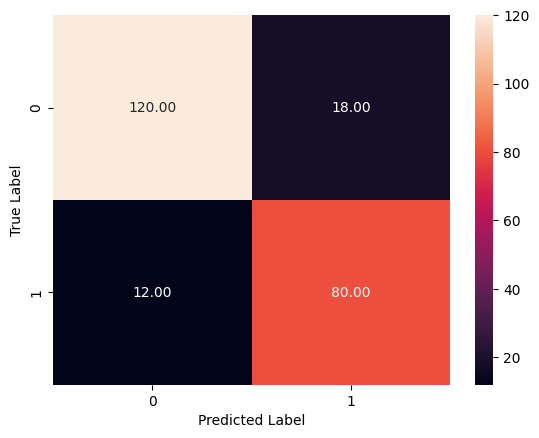

accuracy_score= 0.8695652173913043


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
draw_cm(y_pred_df.actual,y_pred_df.predicted_new)
print("accuracy_score=",accuracy_score(y_pred_df.actual,y_pred_df.predicted_new))
result.append(accuracy_score(y_pred_df.actual,y_pred_df.predicted_new))

In [64]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        92
           1       0.91      0.87      0.89       138

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



## Kernel SVM

In [65]:


## Importing the dataset

df = pd.read_csv('heart[1].csv')

df.shape

df.info()

df.head()

x_features=list(df.columns)
x_features.remove("HeartDisease")

dataset=pd.get_dummies(df[x_features],drop_first=True)

dataset.head()


X = dataset.values
y = df.HeartDisease.values

X[0:5,:]

y

## Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## finding optimal parameters for our classifier

In [66]:
from sklearn.svm import SVC
tuned_parameters=[{"kernel":['poly', 'rbf'],"C":[0.1,1,10,100],"gamma":['scale','auto',1,0.1,0.01,0.001,0.0001]}]
clf=GridSearchCV(SVC(),tuned_parameters,cv=10,scoring="roc_auc")
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                    0.0001],
                          'kernel': ['poly', 'rbf']}],
             scoring='roc_auc')

In [67]:
clf.best_score_

0.9340644071490847

In [68]:
clf.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

## Training the SVC model on the Training set

In [69]:
classifier = SVC(kernel = 'rbf',C=1,gamma='auto',probability=True,random_state =40)
classifier.fit(X_train, y_train)

SVC(C=1, gamma='auto', probability=True, random_state=40)

## k-fold cross validation

In [70]:
ans_k=stratified_fold(X_train, y_train,classifier)
ans=sum(ans_k)
print(ans_k)
print("average=",ans/10)

[0.855072463768116, 0.8840579710144928, 0.8985507246376812, 0.927536231884058, 0.8840579710144928, 0.8840579710144928, 0.9130434782608695, 0.8260869565217391, 0.8382352941176471, 0.8823529411764706]
average= 0.8793052003410059


## roc curve and auc score

In [71]:
y_pred_df=pd.DataFrame({"actual":y_test,"predicted_prob":classifier.predict_proba(X_test)[:,1]})

In [72]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob
217,1,0.846006
66,0,0.083256
9,1,0.740446
193,1,0.652352
15,1,0.901648
199,1,0.957529
25,1,0.949934
195,0,0.022339
154,1,0.746449
126,0,0.120748


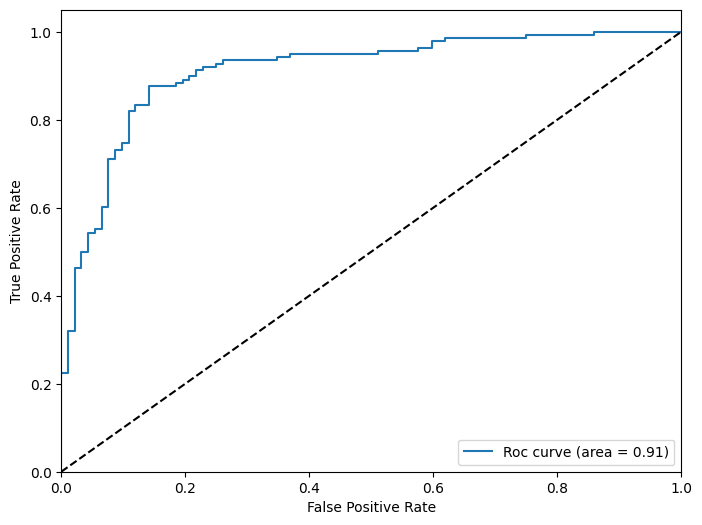

In [73]:
fpr,tpr,thresholds=draw_roc(y_pred_df.actual,y_pred_df.predicted_prob)

## Finding optimal cutoff probability(Youden's Index)

In [74]:
tpr_fpr=pd.DataFrame({"tpr":tpr,"fpr":fpr,"thresholds":thresholds})
tpr_fpr["diff"]=tpr_fpr.tpr-tpr_fpr.fpr
tpr_fpr.sort_values("diff",ascending=False)[0:5]

,tpr,fpr,thresholds,diff
134,0.876812,0.141304,0.506744,0.735507
133,0.869565,0.141304,0.558063,0.728261
132,0.862319,0.141304,0.558228,0.721014
135,0.876812,0.163043,0.500000,0.713768
126,0.833333,0.119565,0.670001,0.713768


In [75]:
y_pred_df["predicted_new"]=y_pred_df.predicted_prob.map(lambda x:1 if x >= 0.506744 else 0)

In [76]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted_new
217,1,0.846006,1
66,0,0.083256,0
9,1,0.740446,1
193,1,0.652352,1
15,1,0.901648,1
199,1,0.957529,1
25,1,0.949934,1
195,0,0.022339,0
154,1,0.746449,1
126,0,0.120748,0


## confusion matrix and accuracy score

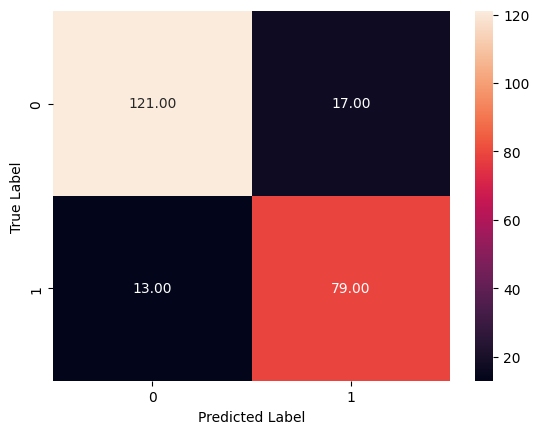

accuracy_score= 0.8695652173913043


In [77]:
y_pred = classifier.predict(X_test)
draw_cm(y_pred_df.actual,y_pred_df.predicted_new)
print("accuracy_score=",accuracy_score(y_pred_df.actual,y_pred_df.predicted_new))
result.append(accuracy_score(y_pred_df.actual,y_pred_df.predicted_new))

In [78]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        92
           1       0.90      0.88      0.89       138

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



# Logistic Regression

In [79]:
# Logistic Regression


## importing the dataset

df = pd.read_csv('heart[1].csv')

df.shape

df.info()

df.head()

x_features=list(df.columns)
x_features.remove("HeartDisease")

x_features

## enoding the categorical variables

dataset=pd.get_dummies(df[x_features],drop_first=True)

dataset.head()

dataset.shape


X = dataset.values
y = df.HeartDisease.values

X[0:5,:]

y

## Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 40)
classifier.fit(X_train, y_train)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


LogisticRegression(random_state=40)

## k-fold cross validation

In [80]:
ans_k=stratified_fold(X_train, y_train,classifier)
ans=sum(ans_k)
print(ans_k)
print("average=",ans/10)

[0.8260869565217391, 0.8115942028985508, 0.8115942028985508, 0.8405797101449275, 0.8260869565217391, 0.8840579710144928, 0.9130434782608695, 0.8840579710144928, 0.8970588235294118, 0.8970588235294118]
average= 0.8591219096334187


## roc curve and auc score

In [81]:
y_pred_df=pd.DataFrame({"actual":y_test,"predicted_prob":classifier.predict_proba(X_test)[:,1]})

In [82]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob
217,1,0.705753
66,1,0.933374
9,0,0.672945
193,1,0.549785
15,0,0.028825
199,1,0.976853
25,1,0.882475
195,0,0.200922
154,0,0.051100
126,1,0.964081


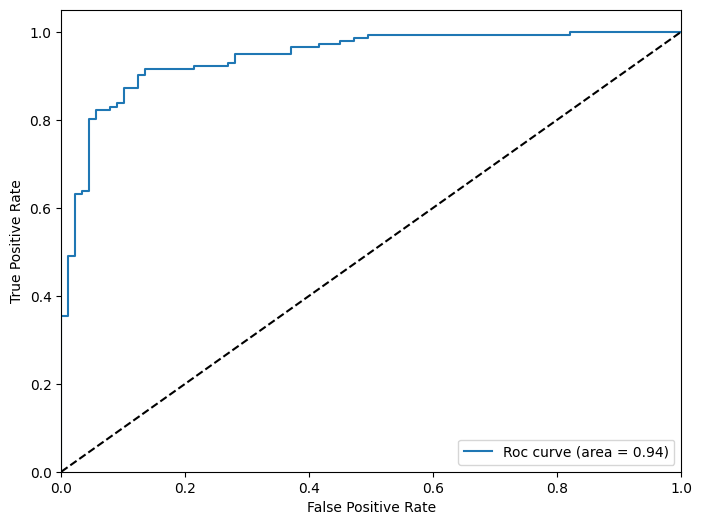

In [83]:
fpr,tpr,thresholds=draw_roc(y_pred_df.actual,y_pred_df.predicted_prob)

## Finding optimal cutoff probability(Youden's Index)

In [84]:
tpr_fpr=pd.DataFrame({"tpr":tpr,"fpr":fpr,"thresholds":thresholds})
tpr_fpr["diff"]=tpr_fpr.tpr-tpr_fpr.fpr
tpr_fpr.sort_values("diff",ascending=False)[0:5]

,tpr,fpr,thresholds,diff
141,0.914894,0.134831,0.469400,0.780062
138,0.900709,0.123596,0.474588,0.777114
140,0.907801,0.134831,0.470770,0.772970
132,0.872340,0.101124,0.531844,0.771217
137,0.893617,0.123596,0.485747,0.770022


In [85]:
y_pred_df["predicted_new"]=y_pred_df.predicted_prob.map(lambda x:1 if x >= 0.469596 else 0)

In [86]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted_new
217,1,0.705753,1
66,1,0.933374,1
9,0,0.672945,1
193,1,0.549785,1
15,0,0.028825,0
199,1,0.976853,1
25,1,0.882475,1
195,0,0.200922,0
154,0,0.051100,0
126,1,0.964081,1


## confusion matrix and accuracy score

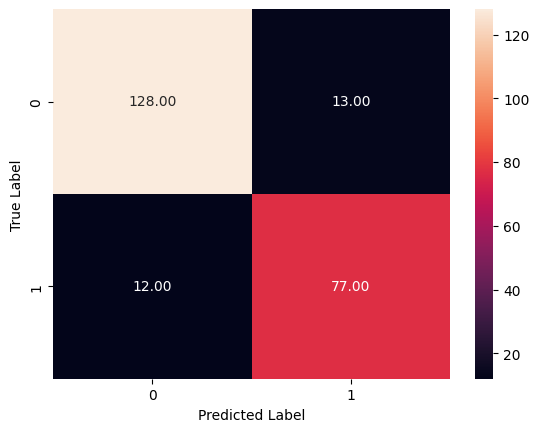

accuracy_score= 0.8913043478260869


In [87]:
y_pred = classifier.predict(X_test)
draw_cm(y_pred_df.actual,y_pred_df.predicted_new)
print("accuracy_score=",accuracy_score(y_pred_df.actual,y_pred_df.predicted_new))
result.append(accuracy_score(y_pred_df.actual,y_pred_df.predicted_new))

In [88]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        89
           1       0.91      0.91      0.91       141

    accuracy                           0.89       230
   macro avg       0.88      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



## random forest classification

In [89]:
# Random Forest Classification

## Importing the dataset

df = pd.read_csv('heart[1].csv')

df.shape

df.info()

df.head()

x_features=list(df.columns)
x_features.remove("HeartDisease")

x_features

dataset=pd.get_dummies(df[x_features],drop_first=True)

dataset.head()

dataset.shape


X = dataset.values
y = df.HeartDisease.values

X[0:5,:]

y

## Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## finding optimal parameters for our classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
#tuned_parameters=[{"max_depth":[10,20,30,40,50,60,70,80,90,100,110,120,130],"n_estimators":range(10,21),"max_features":["sqrt",0.2]}]
#clf=GridSearchCV(RandomForestClassifier(),tuned_parameters,cv=10,scoring="roc_auc")
#clf.fit(X_train, y_train)

In [91]:
#clf.best_score_

In [92]:
#clf.best_params_

## Training the random forest model on the Training set

In [93]:
classifier = RandomForestClassifier(n_estimators = 17,max_depth=10,max_features=0.2, random_state = 40)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, n_estimators=17,
                       random_state=40)

## k-fold cross validation

In [94]:
ans_k=stratified_fold(X_train, y_train,classifier)
ans=sum(ans_k)
print(ans_k)
print("average=",ans/10)

[0.8985507246376812, 0.8405797101449275, 0.8840579710144928, 0.855072463768116, 0.7971014492753623, 0.8695652173913043, 0.8695652173913043, 0.855072463768116, 0.8235294117647058, 0.8823529411764706]
average= 0.8575447570332482


## roc curve and auc curve

In [95]:
y_pred_df=pd.DataFrame({"actual":y_test,"predicted_prob":classifier.predict_proba(X_test)[:,1]})

In [96]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob
217,1,0.815857
66,1,0.740484
9,0,0.701031
193,1,0.475490
15,0,0.004011
199,1,0.990521
25,1,0.755656
195,0,0.183007
154,0,0.245989
126,1,0.924865


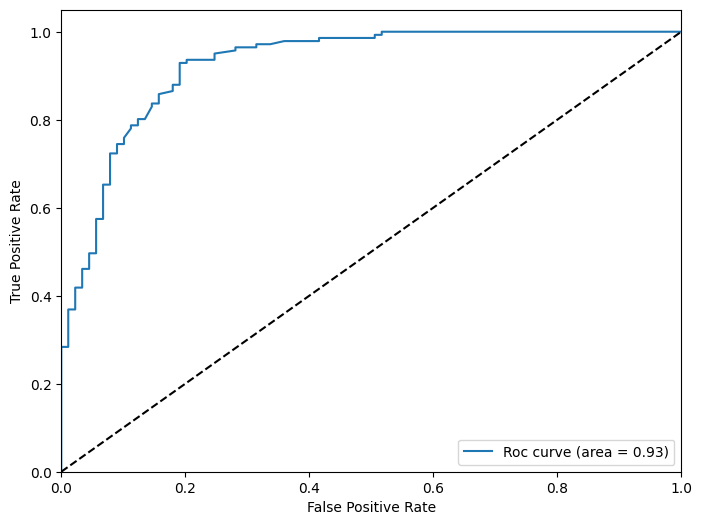

In [97]:
fpr,tpr,thresholds=draw_roc(y_pred_df.actual,y_pred_df.predicted_prob)

## Finding optimal cutoff probability(Youden's Index)

In [98]:
tpr_fpr=pd.DataFrame({"tpr":tpr,"fpr":fpr,"thresholds":thresholds})
tpr_fpr["diff"]=tpr_fpr.tpr-tpr_fpr.fpr
tpr_fpr.sort_values("diff",ascending=False)[0:5]

,tpr,fpr,thresholds,diff
121,0.929078,0.191011,0.452941,0.738067
123,0.936170,0.202247,0.419118,0.733923
120,0.921986,0.191011,0.453782,0.730975
122,0.929078,0.202247,0.436134,0.726831
119,0.914894,0.191011,0.470588,0.723882


In [99]:
y_pred_df["predicted_new"]=y_pred_df.predicted_prob.map(lambda x:1 if x > 0.45 else 0)

In [100]:
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted_new
217,1,0.815857,1
66,1,0.740484,1
9,0,0.701031,1
193,1,0.475490,1
15,0,0.004011,0
199,1,0.990521,1
25,1,0.755656,1
195,0,0.183007,0
154,0,0.245989,0
126,1,0.924865,1


## confusion matrix and accuracy score

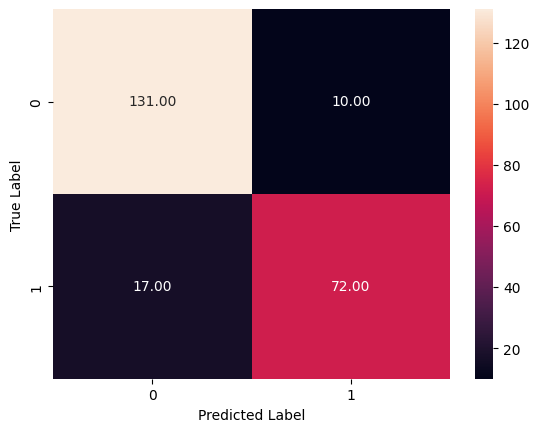

accuracy_score= 0.8826086956521739


In [101]:
y_pred = classifier.predict(X_test)
draw_cm(y_pred_df.actual,y_pred_df.predicted_new)
print("accuracy_score=",accuracy_score(y_pred_df.actual,y_pred_df.predicted_new))
result.append(accuracy_score(y_pred_df.actual,y_pred_df.predicted_new))

In [102]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        89
           1       0.89      0.93      0.91       141

    accuracy                           0.88       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.88      0.88       230



## comparision of predictive models

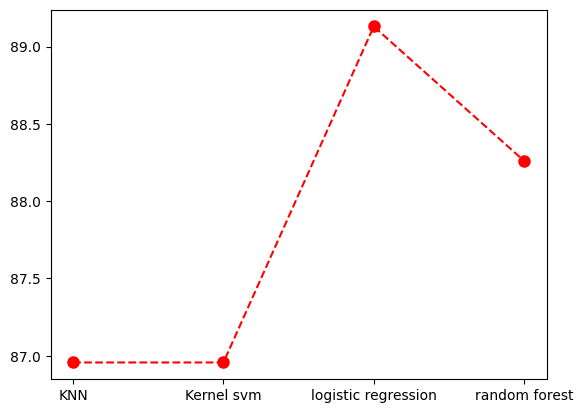

In [104]:
models=["KNN","Kernel svm","logistic regression","random forest"]
#odels=[KNN,Kernel SVM,Logistic Regression,Random Forest]
nlst=[]
nlst=[i*100 for i in result]
x=models
y=nlst
plt.plot(x, y, marker='o', linestyle='--', markersize=8, color='r', label='Scatter Plot')